<a href="https://colab.research.google.com/github/vidhi-sareen/text_emotion_detection/blob/main/emotional_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import neattext as nt

In [ ]:
import neattext.functions as nfx

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/emotion_text/emotion_dataset_2.csv")

In [ ]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [ ]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

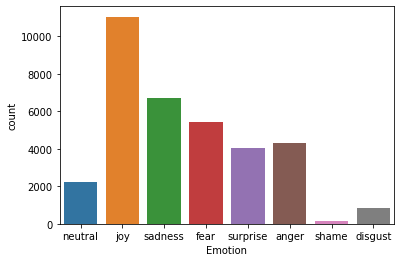

In [ ]:
sns.countplot(x='Emotion',data=df)

In [ ]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [ ]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_stopwords)

In [ ]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_special_characters)

In [ ]:
df

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,Why
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,Such an eye The true hazel eyeand so brillia...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Iluvmiasantos ugh babe hugggzzz for u babe n...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,MichelGW have you gift Hope you like it Its ha...
34788,34788,joy,The world didnt give it to me..so the world MO...,The world didnt give it to meso the world MOST...
34789,34789,anger,A man robbed me today .,A man robbed me today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu call it JEALOUSY I call it of Losing YOU


In [ ]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [ ]:
pipe_lr.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
pipe_lr.score(x_test,y_test)

0.6336462923931788

In [ ]:
exl = "This book was so interesting it made me happy"

In [ ]:
pipe_lr.predict([exl])

array(['joy'], dtype=object)

In [ ]:
pipe_lr.predict_proba([exl])

array([[5.99100267e-03, 9.07585027e-03, 1.98519577e-03, 8.84488380e-01,
        1.33474289e-03, 1.83941883e-02, 7.25679926e-05, 7.86580717e-02]])

In [ ]:
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [ ]:
ex2 = "I'm sorry at least it's Friday?"

In [ ]:
pipe_lr.predict([ex2])

array(['sadness'], dtype=object)

In [ ]:
ex3 = "Got the news"

In [ ]:
pipe_lr.predict([ex3])

array(['joy'], dtype=object)

In [ ]:
import joblib
pipeline_file = open("/content/drive/MyDrive/emotion_text/emotion_classifer_pipe_lr")
joblib.dump(pipe_lr,"/content/drive/MyDrive/emotion_text/emotion_classifer_pipe_lr")
pipeline_file.close()